# Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/sentiment"

In [ ]:
%cd "/content/gdrive/My Drive/sentiment" 

/content/gdrive/.shortcut-targets-by-id/17PcJyjAgMisrwuki4xCbwotLrm_aqzIV/sentiment


# Data loading

In [ ]:
pip install transformers

     |████████████████████████████████| 4.2 MB 4.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 596 kB 92.9 MB/s 
     |████████████████████████████████| 6.6 MB 66.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install fast_ml==3.68


     |████████████████████████████████| 42 kB 792 kB/s 


In [ ]:
pip install datasets

     |████████████████████████████████| 346 kB 4.2 MB/s 
     |████████████████████████████████| 140 kB 60.6 MB/s 
     |████████████████████████████████| 212 kB 67.1 MB/s 
     |████████████████████████████████| 1.1 MB 79.5 MB/s 
     |████████████████████████████████| 127 kB 88.4 MB/s 
     |████████████████████████████████| 271 kB 94.2 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 58.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from fast_ml.model_development import train_valid_test_split
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import torch
from torch import nn
from torch.nn.functional import softmax
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import datasets

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (f'Device Availble: {DEVICE}')

Device Availble: cuda


In [ ]:
df = pd.read_csv('./AMAZON_FASHION_5.csv')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style/Size:,style/Color:,reviewerName,reviewText,summary,unixReviewTime,style/Size Name:,style/Style:,vote,image/0,image/1,image/2
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Orange,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Black (37467610) / Red/White,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Gray Logo,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue (37867638-99) / Yellow,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Pink,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           3176 non-null   int64  
 1   verified          3176 non-null   bool   
 2   reviewTime        3176 non-null   object 
 3   reviewerID        3176 non-null   object 
 4   asin              3176 non-null   object 
 5   style/Size:       3102 non-null   object 
 6   style/Color:      3095 non-null   object 
 7   reviewerName      3176 non-null   object 
 8   reviewText        3160 non-null   object 
 9   summary           3176 non-null   object 
 10  unixReviewTime    3176 non-null   int64  
 11  style/Size Name:  2 non-null      object 
 12  style/Style:      3 non-null      object 
 13  vote              297 non-null    float64
 14  image/0           106 non-null    object 
 15  image/1           32 non-null     object 
 16  image/2           24 non-null     object 


In [ ]:
df.drop_duplicates()

,overall,verified,reviewTime,reviewerID,asin,style/Size:,style/Color:,reviewerName,reviewText,summary,unixReviewTime,style/Size Name:,style/Style:,vote,image/0,image/1,image/2
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Orange,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Black (37467610) / Red/White,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Gray Logo,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue (37867638-99) / Yellow,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Big Boys,Blue/Pink,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,8.5 B(M) US,Green Glow/Seaweed - Hasta - White,Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN,NaN,NaN,NaN,NaN
3172,5,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,5 B(M) US,Wolf Grey/Black-pink Blast/White,J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN,NaN,NaN,NaN,NaN
3173,5,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,8 B(M) US,Blue Tint/Green Glow/Hasta/White,Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN,NaN,NaN,NaN,NaN
3174,5,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,9 B(M) US,Blue Tint/Green Glow/Hasta/White,Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization 

In [ ]:
import seaborn as sns

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df = df[['asin','reviewText','summary','overall','reviewerID']]
df.head()

,asin,reviewText,summary,overall,reviewerID
0,B000K2PJ4K,Great product and price!,Five Stars,5,ALJ66O1Y6SLHA
1,B000K2PJ4K,Great product and price!,Five Stars,5,ALJ66O1Y6SLHA
2,B000K2PJ4K,Great product and price!,Five Stars,5,ALJ66O1Y6SLHA
3,B000K2PJ4K,Great product and price!,Five Stars,5,ALJ66O1Y6SLHA
4,B000K2PJ4K,Great product and price!,Five Stars,5,ALJ66O1Y6SLHA


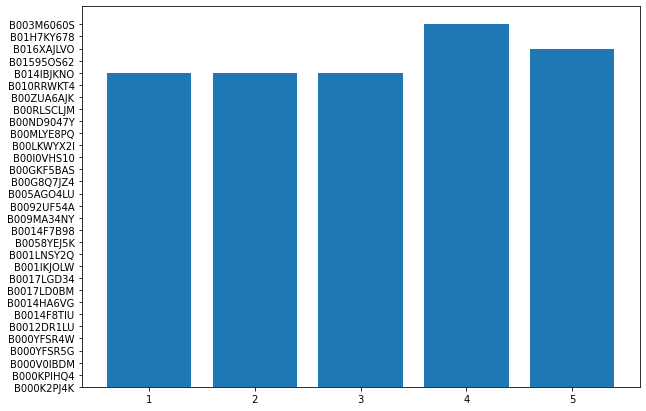

In [ ]:
name = df['overall']
price = df['asin']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name, price)
 
# Show Plot
plt.show()

## Rating count

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

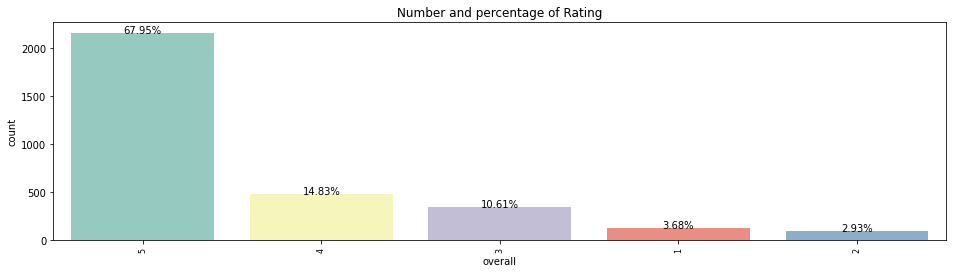

In [ ]:
plot_count("overall", "Rating", df,4)

## Prevalent Words

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')

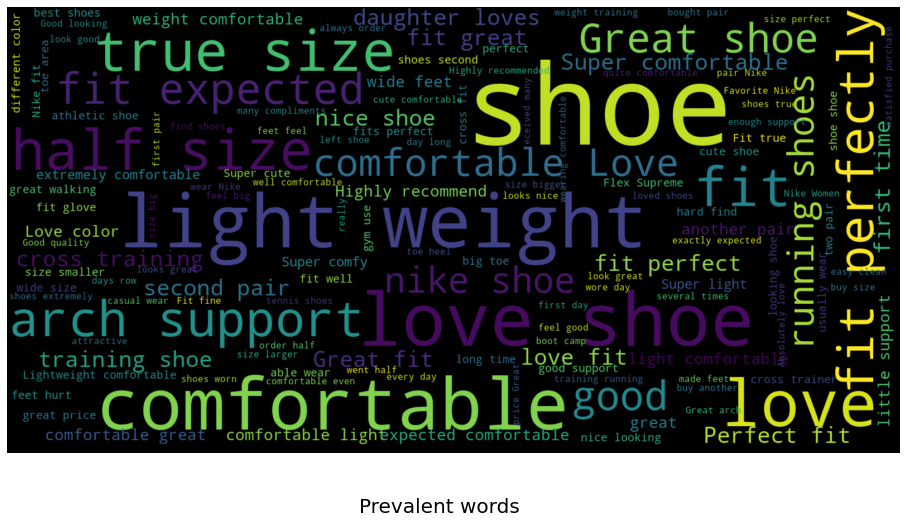

In [ ]:
show_wordcloud(df['reviewText'], title = 'Prevalent words')

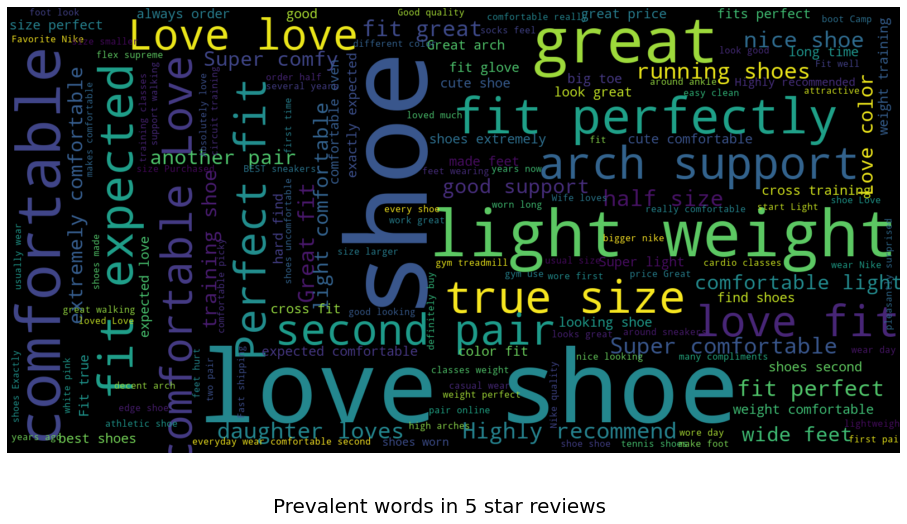

In [ ]:
fivestar = df.loc[df.overall==5]
show_wordcloud(fivestar['reviewText'], title = 'Prevalent words in 5 star reviews')

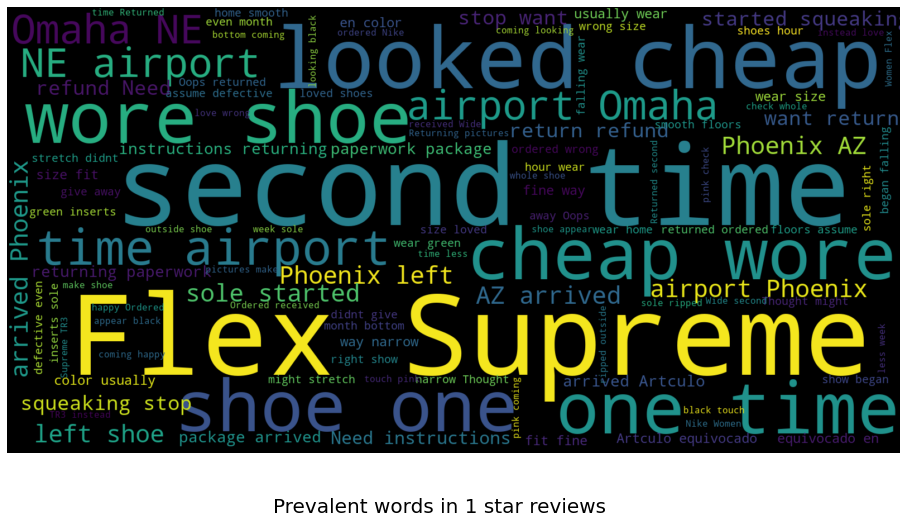

In [ ]:
onestar = df.loc[df.overall==1]
show_wordcloud(onestar['reviewText'], title = 'Prevalent words in 1 star reviews')

# Data Preparation 

In [ ]:
df_reviews = df.loc[:, ['reviewText', 'overall']].dropna()
df_reviews['overall'] = df_reviews['overall'].apply(lambda x: f'{x} Stars' if x != 1 else f'{x} Star')

In [ ]:
df_reviews.head(10)

,reviewText,overall
0,Great product and price!,5 Stars
1,Great product and price!,5 Stars
2,Great product and price!,5 Stars
3,Great product and price!,5 Stars
4,Great product and price!,5 Stars
5,Waaay too small. Will use for futur children!,3 Stars
6,Stays vibrant after many washes,5 Stars
7,Stays vibrant after many washes,5 Stars
8,My son really likes the pink. Ones which I was...,5 Stars
9,Waaay too small. Will use for future child.,3 Stars


In [ ]:
le = LabelEncoder()
df_reviews['overall'] = le.fit_transform(df_reviews['overall'])
df_reviews.head()

,reviewText,overall
0,Great product and price!,4
1,Great product and price!,4
2,Great product and price!,4
3,Great product and price!,4
4,Great product and price!,4


In [ ]:
print (le.classes_)

['1 Star' '2 Stars' '3 Stars' '4 Stars' '5 Stars']


In [ ]:
(train_texts, train_labels,
 val_texts, val_labels,
 test_texts, test_labels) = train_valid_test_split(df_reviews, target = 'overall', train_size=0.8, valid_size=0.1, test_size=0.1)

In [ ]:
train_texts = train_texts['reviewText'].to_list()
train_labels = train_labels.to_list()
val_texts = val_texts['reviewText'].to_list()
val_labels = val_labels.to_list()
test_texts = test_texts['reviewText'].to_list()
test_labels = test_labels.to_list()

# Modeling 

## Model 1 - Sequential LSTM

In [ ]:
X_train = df.loc[:1554,'reviewText'].astype(str).values
X_test = df.loc[1554:3108,'reviewText'].astype(str).values
y_train = df.loc[:1554,'overall'].values
y_test = df.loc[1554:3108,'overall'].values

In [ ]:
pip install keras

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
total_reviews = X_train + X_test
tokenizer_obj.fit_on_texts(total_reviews)
# pad sequences
max_length = max([len(s.split()) for s in total_reviews])
# define vocabulary size
vocab_size = len (tokenizer_obj.word_index) + 1
X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences (X_test)
X_train_pad = pad_sequences (X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences (X_test_tokens, maxlen=max_length, padding='post')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
EMBEDDING_DIM = 100
print ('Build model...')
    # inputs = keras.Input(shape=(sequence_length, num_features))
    # x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)
model = Sequential()
model.add(Embedding (vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32,dropout=0.2, recurrent_dropout=0.2, unroll=True))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Build model...


In [ ]:
print('Train')
model.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data= (X_test_pad, y_test), verbose=2)

Train
Epoch 1/25
13/13 - 249s - loss: -3.2611e-01 - accuracy: 0.0360 - val_loss: -2.1890e+00 - val_accuracy: 0.0334 - 249s/epoch - 19s/step
Epoch 2/25
13/13 - 5s - loss: -4.2686e+00 - accuracy: 0.0412 - val_loss: -8.5801e+00 - val_accuracy: 0.0334 - 5s/epoch - 373ms/step
Epoch 3/25
13/13 - 5s - loss: -1.4045e+01 - accuracy: 0.0412 - val_loss: -2.3714e+01 - val_accuracy: 0.0334 - 5s/epoch - 376ms/step
Epoch 4/25
13/13 - 5s - loss: -2.6983e+01 - accuracy: 0.0412 - val_loss: -3.2482e+01 - val_accuracy: 0.0334 - 5s/epoch - 374ms/step
Epoch 5/25
13/13 - 5s - loss: -3.3424e+01 - accuracy: 0.0412 - val_loss: -3.7101e+01 - val_accuracy: 0.0334 - 5s/epoch - 377ms/step
Epoch 6/25
13/13 - 5s - loss: -3.7242e+01 - accuracy: 0.0412 - val_loss: -4.0152e+01 - val_accuracy: 0.0334 - 5s/epoch - 374ms/step
Epoch 7/25
13/13 - 5s - loss: -3.9923e+01 - accuracy: 0.0412 - val_loss: -4.2532e+01 - val_accuracy: 0.0334 - 5s/epoch - 372ms/step
Epoch 8/25
13/13 - 5s - loss: -4.2156e+01 - accuracy: 0.0412 - val_l

In [ ]:
samples = tokenizer_obj.texts_to_sequences(['Good movie!'])
pad = pad_sequences(samples, maxlen=max_length)
value = model.predict(x=pad)
print(value)

## Model 2

In [ ]:
class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        
        self.tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        
        if bool(sentences):
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            padding = True)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        
        if self.labels == None:
            item['labels'] = None
        else:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
        return self.tokenizer(x, return_tensors = 'pt').to(DEVICE)

In [ ]:
train_dataset = DataLoader(train_texts, train_labels)
val_dataset = DataLoader(val_texts, val_labels)
test_dataset = DataLoader(test_texts, test_labels)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
print (train_dataset.__getitem__(0))

{'input_ids': tensor([  101,  1045,  2513,  2068,  1012,  1012,  1012,  2179,  1037, 29431,
         2912,  3940,  1045,  4669,  2488,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [ ]:
f1 = datasets.load_metric('f1')
accuracy = datasets.load_metric('accuracy')
precision = datasets.load_metric('precision')
recall = datasets.load_metric('recall')
def compute_metrics(eval_pred):
    metrics_dict = {}
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    metrics_dict.update(f1.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(accuracy.compute(predictions = predictions, references = labels))
    metrics_dict.update(precision.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(recall.compute(predictions = predictions, references = labels, average = 'macro'))
    return metrics_dict

In [ ]:
id2label = {idx:label for idx, label in enumerate(le.classes_)}
label2id = {label:idx for idx, label in enumerate(le.classes_)}
config = AutoConfig.from_pretrained('distilbert-base-uncased',
                                    num_labels = 5,
                                    id2label = id2label,
                                    label2id = label2id)
model = AutoModelForSequenceClassification.from_config(config)

In [ ]:
print (config)

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "1 Star",
    "1": "2 Stars",
    "2": "3 Stars",
    "3": "4 Stars",
    "4": "5 Stars"
  },
  "initializer_range": 0.02,
  "label2id": {
    "1 Star": 0,
    "2 Stars": 1,
    "3 Stars": 2,
    "4 Stars": 3,
    "5 Stars": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 30522
}



In [ ]:
print (model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
training_args = TrainingArguments(
    output_dir='/kaggle/working/results',
    num_train_epochs=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.05,
    report_to='none',
    evaluation_strategy='steps',
    logging_dir='/kagge/working/logs',
    logging_steps=50)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics)

In [ ]:
trainer.train()

***** Running training *****
  Num examples = 2528
  Num Epochs = 10
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 400


Step,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
50,1.384500,0.973743,0.163296,0.689873,0.137975,0.200000
100,0.969000,0.850579,0.163296,0.689873,0.137975,0.200000
150,0.771600,0.602233,0.362838,0.765823,0.370058,0.378945
200,0.528300,0.356464,0.471954,0.879747,0.452778,0.510666
250,0.304200,0.196171,0.615761,0.930380,0.906947,0.637416
300,0.171500,0.129724,0.891993,0.968354,0.965124,0.873548
350,0.089700,0.014540,0.996366,0.996835,0.993750,0.999083
400,0.033900,0.018155,0.996264,0.996835,0.999087,0.993548


***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64
***** Running Evaluation *****
  Num examples = 316
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=400, training_loss=0.5315927168726922, metrics={'train_runtime': 701.3683, 'train_samples_per_second': 36.044, 'train_steps_per_second': 0.57, 'total_flos': 2112719658211200.0, 'train_loss': 0.5315927168726922, 'epoch': 10.0})

In [ ]:
eval_results = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 316
  Batch size = 64


In [ ]:
print (eval_results.predictions)

[[-2.0917566  -2.0763252  -2.1236033  -2.3917735   7.3531914 ]
 [-1.7968775  -1.6621969  -1.5181708   6.38843    -0.23826095]
 [-2.281212   -2.853819   -2.453796    3.3025756   4.440497  ]
 ...
 [-2.5456438  -3.1206055  -2.005382    1.1462902   6.1602426 ]
 [-2.4118931  -3.1688824  -1.8913419   1.0807728   6.1078224 ]
 [-2.0945067  -2.3926206  -1.4985697  -2.314929    7.0688267 ]]


In [ ]:
print (eval_results.label_ids)

[4 3 4 3 4 4 4 0 4 4 4 1 4 4 0 1 3 4 4 4 2 4 4 3 4 2 4 4 2 4 2 4 4 4 4 4 3
 4 4 4 3 4 4 2 4 4 3 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 3 4 2 4 4 4 2
 3 4 2 4 2 2 4 3 4 2 4 4 4 2 4 3 2 1 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 3 0 3
 4 3 4 4 4 0 4 4 4 2 4 4 4 4 4 2 4 4 4 2 4 4 4 4 0 4 4 3 0 4 4 4 4 3 4 4 4
 1 4 4 4 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 3 4 4 4 4 2 4 2 4 0
 4 3 4 4 4 4 4 3 4 3 4 4 4 4 4 2 4 4 4 4 3 0 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4
 4 4 4 2 4 4 4 4 3 4 4 4 4 4 4 4 4 0 0 4 3 4 3 4 4 4 4 4 4 1 4 4 4 4 3 4 4
 3 3 4 4 4 0 3 4 4 4 4 3 0 4 3 4 4 2 2 4 4 2 1 3 4 4 4 3 4 4 4 4 4 4 4 4 4
 4 4 3 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4]


In [ ]:
print(eval_results.metrics)

{'test_loss': 0.013608547858893871, 'test_f1': 0.9890838206627681, 'test_accuracy': 0.9968354430379747, 'test_precision': 0.9857142857142858, 'test_recall': 0.993103448275862, 'test_runtime': 3.0345, 'test_samples_per_second': 104.137, 'test_steps_per_second': 1.648}


In [ ]:
label2id_mapper = model.config.id2label
proba = softmax(torch.from_numpy(eval_results.predictions))
pred = [label2id_mapper[i] for i in torch.argmax(proba, dim = -1).numpy()]
actual = [label2id_mapper[i] for i in eval_results.label_ids]

In [ ]:
class_report = classification_report(actual, pred, output_dict = True)
pd.DataFrame(class_report)

,1 Star,2 Stars,3 Stars,4 Stars,5 Stars,accuracy,macro avg,weighted avg
precision,0.928571,1.0,1.000000,1.0,1.0,0.996835,0.985714,0.997061
recall,1.000000,1.0,0.965517,1.0,1.0,0.996835,0.993103,0.996835
f1-score,0.962963,1.0,0.982456,1.0,1.0,0.996835,0.989084,0.996866
support,13.000000,6.0,29.000000,38.0,230.0,0.996835,316.000000,316.000000


In [ ]:
trainer.save_model('./sentiment_model')

Saving model checkpoint to ./sentiment_model
Configuration saved in ./sentiment_model/config.json
Model weights saved in ./sentiment_model/pytorch_model.bin


In [ ]:
import pandas as pd
import numpy as np
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch import nn
from torch.nn.functional import softmax

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (f'Device Availble: {DEVICE}')

Device Availble: cuda


In [ ]:
class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        
        if bool(sentences):
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            padding = True)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        
        if self.labels == None:
            item['labels'] = None
        else:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
        return self.tokenizer(x, return_tensors = 'pt').to(DEVICE)

In [ ]:
class SentimentModel():
    
    def __init__(self, model_path):
        
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path).to(DEVICE)
        args =  TrainingArguments(output_dir='/kaggle/working/results', per_device_eval_batch_size=64)
        self.batch_model = Trainer(model = self.model, args= args)
        self.single_dataloader = DataLoader()
        
    def batch_predict_proba(self, x):
        
        predictions = self.batch_model.predict(DataLoader(x))
        logits = torch.from_numpy(predictions.predictions)
        
        if DEVICE == 'cpu':
            proba = torch.nn.functional.softmax(logits, dim = 1).detach().numpy()
        else:
            proba = torch.nn.functional.softmax(logits, dim = 1).to('cpu').detach().numpy()
        return proba
        
        
    def predict_proba(self, x):
        
        x = self.single_dataloader.encode(x).to(DEVICE)
        predictions = self.model(**x)
        logits = predictions.logits
        
        if DEVICE == 'cpu':
            proba = torch.nn.functional.softmax(logits, dim = 1).detach().numpy()
        else:
            proba = torch.nn.functional.softmax(logits, dim = 1).to('cpu').detach().numpy()
        return proba

In [ ]:
df = pd.read_csv('./AMAZON_FASHION_5.csv')
# df.drop(columns = ['Unnamed: 0'], inplace = True)
df_reviews = df.loc[:, ['reviewText', 'overall']].dropna()
df_reviews['Rating'] = df_reviews['overall'].apply(lambda x: f'{x} Stars' if x != 1 else f'{x} Star')
df_reviews.head()

,reviewText,overall,Rating
0,Great product and price!,5,5 Stars
1,Great product and price!,5,5 Stars
2,Great product and price!,5,5 Stars
3,Great product and price!,5,5 Stars
4,Great product and price!,5,5 Stars


In [ ]:
batch_sentences = df_reviews.sample(n = 1000, random_state = 1)['reviewText'].to_list()
single_sentence = df_reviews.sample(n = 1, random_state = 1)['reviewText'].to_list()[0]

In [ ]:
sentiment_model = SentimentModel('./sentiment_model')

loading configuration file ./sentiment_model/config.json
Model config DistilBertConfig {
  "_name_or_path": "./sentiment_model",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "1 Star",
    "1": "2 Stars",
    "2": "3 Stars",
    "3": "4 Stars",
    "4": "5 Stars"
  },
  "initializer_range": 0.02,
  "label2id": {
    "1 Star": 0,
    "2 Stars": 1,
    "3 Stars": 2,
    "4 Stars": 3,
    "5 Stars": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.19.2",
  "vocab_size": 30522
}

loading weights file ./sentiment_model/pytorch_model.bin
All model checkpoi

In [ ]:
single_sentence_probas = sentiment_model.predict_proba(single_sentence)
id2label = sentiment_model.model.config.id2label
predicted_class_label = id2label[np.argmax(single_sentence_probas)]

print (predicted_class_label)

3 Stars


In [ ]:
batch_sentence_probas = sentiment_model.batch_predict_proba(batch_sentences)
predicted_class_labels = [id2label[i] for i in np.argmax(batch_sentence_probas, axis = -1)]

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

In [ ]:

for sentence in batch_sentences:
    single_sentence_probas = sentiment_model.predict_proba(sentence)

batch_sentence_probas = sentiment_model.batch_predict_proba(batch_sentences)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

## Model 3


In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df_reviews.head()

,reviewText,overall,Rating
0,Great product and price!,5,5 Stars
1,Great product and price!,5,5 Stars
2,Great product and price!,5,5 Stars
3,Great product and price!,5,5 Stars
4,Great product and price!,5,5 Stars


In [ ]:
train_set = df_reviews[0:2000]
valid_set = df_reviews[2000:2500]
test_set  = df_reviews[2500:]
train_set = train_set.drop(["overall"], axis=1)
valid_set = valid_set.drop(["overall"], axis=1)

In [ ]:
train_set.head()

,reviewText,Rating
0,Great product and price!,5 Stars
1,Great product and price!,5 Stars
2,Great product and price!,5 Stars
3,Great product and price!,5 Stars
4,Great product and price!,5 Stars


In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    
    if scores["neg"] > scores["pos"]:
        return 0

    return 1

train_set["vader_result"] = train_set["reviewText"].apply(lambda x: vader_sentiment_result(x))
valid_set["vader_result"] = valid_set["reviewText"].apply(lambda x: vader_sentiment_result(x))

In [ ]:
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the BERT Tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# The dataset class
class TheDataset(torch.utils.data.Dataset):

    def __init__(self, reviews, sentiments, tokenizer):
        self.reviews    = reviews
        self.sentiments = sentiments
        self.tokenizer  = tokenizer
        self.max_len    = tokenizer.model_max_length
  
    def __len__(self):
        return len(self.reviews)
  
    def __getitem__(self, index):
        review = str(self.reviews[index])
        sentiments = self.sentiments[index]

        encoded_review = self.tokenizer.encode_plus(
            review,
            add_special_tokens    = True,
            max_length            = self.max_len,
            return_token_type_ids = False,
            return_attention_mask = True,
            return_tensors        = 'pt',
            padding               = "max_length",
            truncation            = True
        )

        return {
            'input_ids': encoded_review['input_ids'][0],
            'attention_mask': encoded_review['attention_mask'][0],
            'labels': torch.tensor(sentiments, dtype=torch.long)
        }

# Prepare the Train/Validation sets
train_set_dataset = TheDataset(
    reviews    = train_set.reviewText.tolist(),
    sentiments = train_set.vader_result.tolist(),
    tokenizer  = tokenizer,
)

valid_set_dataset = TheDataset(
    reviews    = valid_set.reviewText.tolist(),
    sentiments = valid_set.vader_result.tolist(),
    tokenizer  = tokenizer,
)

# Load the BERT model
model = BertForSequenceClassification.from_pretrained("bert-large-uncased")

# Freeze BERT except (the 24th layer + the last pooler layer)
for name, param in model.bert.named_parameters():
    if ( not name.startswith('pooler') ) and "layer.23" not in name :
        param.requires_grad = False

# The function to get the accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define the training parameters
training_args = TrainingArguments(
    output_dir                  = "./sentiment-analysis-model2",
    num_train_epochs            = 5,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size  = 64,
    warmup_steps                = 500,
    weight_decay                = 0.01,
    save_strategy               = "epoch",
    evaluation_strategy         = "steps"
)

# Define the Huggingface Trainer object
trainer = Trainer(
    model           = model,
    args            = training_args,
    train_dataset   = train_set_dataset,
    eval_dataset    = valid_set_dataset,
    compute_metrics = compute_metrics
)

# Start pre-training!
trainer.train()

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.178200,0.007334,0.996000,0.997868,1.000000,0.995745


Saving model checkpoint to ./sentiment-analysis-model2/checkpoint-125
Configuration saved in ./sentiment-analysis-model2/checkpoint-125/config.json
Model weights saved in ./sentiment-analysis-model2/checkpoint-125/pytorch_model.bin
Saving model checkpoint to ./sentiment-analysis-model2/checkpoint-250
Configuration saved in ./sentiment-analysis-model2/checkpoint-250/config.json
Model weights saved in ./sentiment-analysis-model2/checkpoint-250/pytorch_model.bin
Saving model checkpoint to ./sentiment-analysis-model2/checkpoint-375
Configuration saved in ./sentiment-analysis-model2/checkpoint-375/config.json
Model weights saved in ./sentiment-analysis-model2/checkpoint-375/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 500
  Batch size = 64
Saving model checkpoint to ./sentiment-analysis-model2/checkpoint-500
Configuration saved in ./sentiment-analysis-model2/checkpoint-500/config.json
Model weights saved in ./sentiment-analysis-model2/checkpoint-500/pytorch_model.bin
Sa

TrainOutput(global_step=625, training_loss=0.14577015686035155, metrics={'train_runtime': 6443.0711, 'train_samples_per_second': 1.552, 'train_steps_per_second': 0.097, 'total_flos': 9319313633280000.0, 'train_loss': 0.14577015686035155, 'epoch': 5.0})

In [ ]:
 # Load the checkpoint
model = BertForSequenceClassification.from_pretrained("./sentiment-analysis-model2/checkpoint-1250")

# Make the test set ready
test_set_dataset = TheDataset(
    reviews    = test_set.reviewText.tolist(),
    sentiments = test_set.overall.tolist(),
    tokenizer  = tokenizer,
)

training_args = TrainingArguments(
    output_dir = "./sentiment-analysis",
    do_predict = True
)

trainer = Trainer(
    model           = model,
    args            = training_args,
    compute_metrics =compute_metrics,
)

trainer.predict(test_set_dataset)